In [35]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [49]:
with open("NESN.SW.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',', quotechar='|')
    stocks = [row for row in reader]

stocks = np.array(stocks)

new_stocks = np.array([])

for s in stocks:
    new_s = {}
    new_s['date'] = s.pop('Date')
    new_s['open'] = float(s.pop('Open'))
    new_s.update(s)
    new_stocks = np.append(new_stocks, new_s)

stocks = new_stocks
#print(stocks)

In [58]:
with open("nestle_merged_output.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=' ', quotechar='|')
    attention = [row for row in reader]

attention = np.array(attention)
for row in attention:
    row['attention'] = float(row['attention'])
    row.pop(None)

# print(attention)

In [59]:
dates = np.array([])
stockopen = np.array([])
attentionval = np.array([])

for s in stocks:
    for a in attention:
        if s['date'] == a['date']:
            dates = np.append(dates, s['date'])
            stockopen = np.append(stockopen, s['open'])
            attentionval = np.append(attentionval, a['attention'])

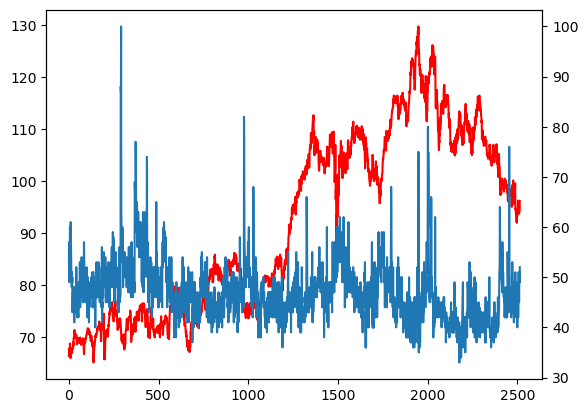

In [61]:
timeaxis = np.arange(len(dates))


fig, ax1 = plt.subplots()
ax1.plot(timeaxis,stockopen,'r')
ax2 = ax1.twinx()
ax2.plot(timeaxis,attentionval)